In [1]:
import pandas as pd
import numpy as np
import itertools
import re
import csv

from pprint import pprint
from collections import Counter

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

import gensim
from gensim import corpora, models, similarities
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim

import nltk
from konlpy.tag import *

from IPython.display import display
from IPython.display import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

from datetime import datetime
from time import time
import codecs

import networkx as nx
from ipywidgets import widgets, interactive

%matplotlib inline
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', '{:,.2f}'.format)

init_notebook_mode()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



In [2]:
import matplotlib.pyplot as plt

In [7]:
alist = [1, 2, 3] 
blist = [4, 5, 6]

In [4]:
zip(alist, blist)

In [9]:
for j, (m, c) in enumerate(zip(alist,blist)):
    print (j, m, c)

0 1 4
1 2 5
2 3 6


In [21]:
import sys
from PIL import Image

images = map(Image.open, ['Coherence_Scores_After LCGG_Conservative.png', 'Coherence_Scores_After LCGG_Progressive.png'])
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

plt.show()
#new_im.save('test.png')

<IPython.core.display.Javascript object>


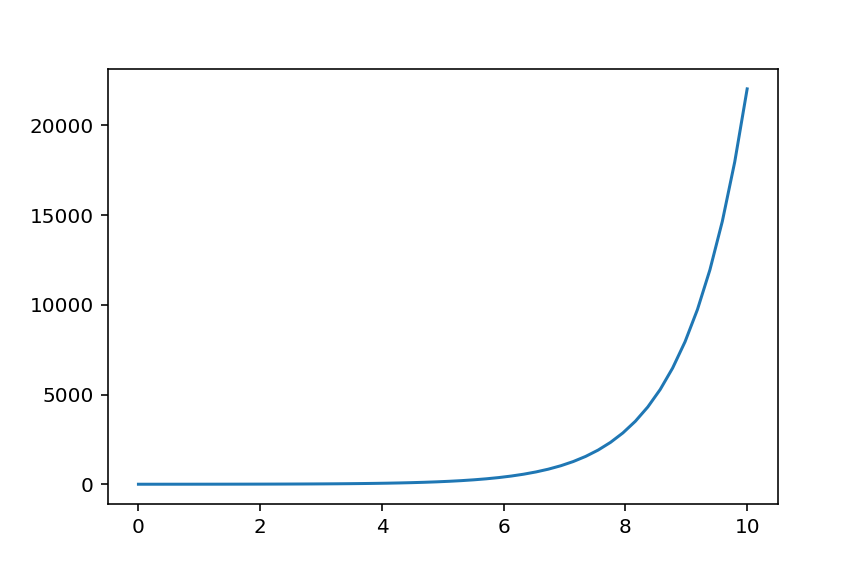

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib notebook

ax = plt.subplot(111)
x = np.linspace(0, 10)
y = np.exp(x)
plt.plot(x, y)
with open('myplot.pkl','wb') as fid:
    pickle.dump(ax, fid)

<IPython.core.display.Javascript object>


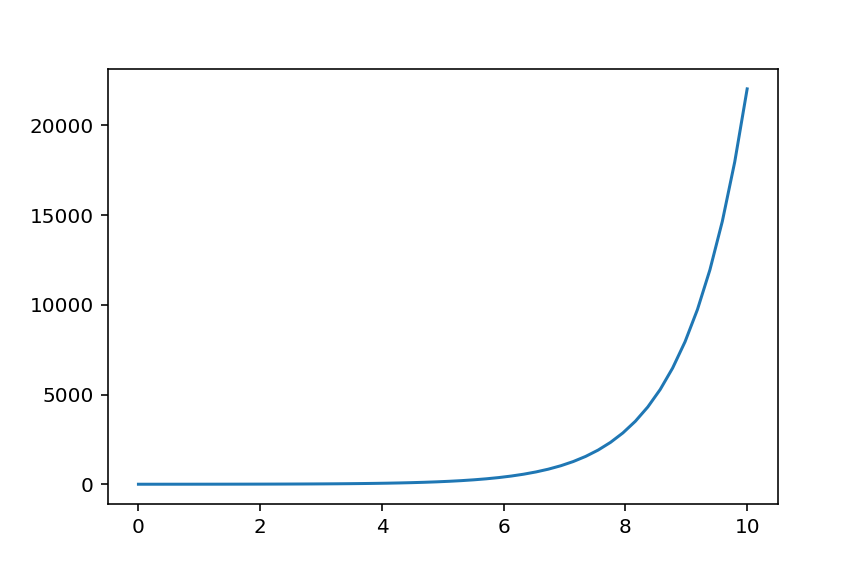

In [28]:
%matplotlib notebook

with open('myplot.pkl','rb') as fid:
    ax = pickle.load(fid)
plt.show()

In [15]:
topic_num_list = [3, 5, 10, 15, 20]
coherence_values = [0.46, 0.35, 0.45, 0.49, 0.33]

co_values = 0

covalList = []
modelnumList = []
topicnumList = []

for j, (m, cv) in enumerate(zip(topic_num_list, coherence_values)):

    covalList.append(cv)
    modelnumList.append(j)
    topicnumList.append(m)

    if co_values > 0.50 and cv <= co_values:
        co_vlaues = cv
        break
    else:
        co_values = cv
        model_num = j
        topic_num = m        

print (co_values)
print (model_num)
print (topic_num)

if co_values < 0.50: 
    temp = max (covalList)
    point = [i for i, j in enumerate(covalList) if j == temp]

    co_values = covalList[point[0]]
    model_num = modelnumList[point[0]]
    topic_num = topicnumList[point[0]]

print (co_values)
print (model_num)
print (topic_num)


0.33
4
20
0.49
3
15


In [1]:
x = range(2, 10, 2)

In [2]:
print (x)

range(2, 10, 2)


In [11]:
x_value = [3, 5, 10, 15, 20]
y_value = [5, 7, 2, 10, 30]

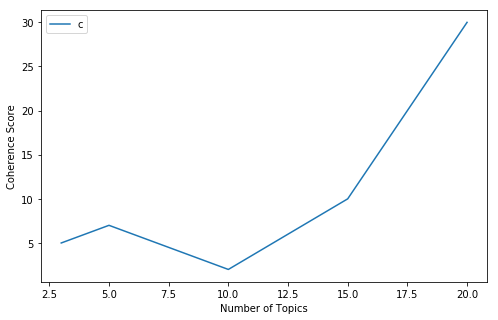

In [14]:
fig = plt.subplots(figsize=(8, 5))

#x = range(start, limit, step)
#plt.title(image_name + '\n', size = 15)

plt.plot (x_value, y_value)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend (("coherence_values"), loc = "best")

In [16]:
import datetime
from datetime import timedelta

In [23]:
process_time = 287.628604888916

print ('{:0>8}'.format(str(datetime.timedelta(seconds=process_time))))

0:04:47.628605


In [28]:
i = 11
i%2

1

In [31]:
for i in range (2):
    print (i)

0
1


In [40]:
import gensim

SyntaxError: invalid syntax (<ipython-input-40-406a5a7062ae>, line 2)

In [6]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO, filename = 'ALL_running.log', filemode = 'w')

In [10]:
lda_model = gensim.models.LdaModel.load('LDA_optimal_model_After LCGG_Conservative.model')

In [14]:
corpus = gensim.corpora.MmCorpus('After_LCGG_Conservative_ENG.mm')

In [15]:
topics = lda_model.show_topics(formatted=False, num_words = 20)
pprint(lda.print_topics(num_words=10))

[(0,
  '0.015*"문제" + 0.014*"사람" + 0.014*"인간" + 0.011*"지구" + 0.011*"사회" + 0.010*"과학" '
  '+ 0.010*"생각" + 0.009*"세계" + 0.008*"교수" + 0.008*"인류"'),
 (1,
  '0.015*"기온" + 0.014*"지역" + 0.014*"지구" + 0.013*"상승" + 0.011*"바다" + 0.011*"평균" '
  '+ 0.011*"연구" + 0.011*"영향" + 0.010*"발생" + 0.009*"피해"'),
 (2,
  '0.016*"지원" + 0.012*"사업" + 0.012*"기획" + 0.011*"팀장" + 0.010*"관리" + 0.010*"정책" '
  '+ 0.010*"부장" + 0.009*"연구" + 0.009*"본부" + 0.009*"센터"'),
 (3,
  '0.050*"미국" + 0.038*"중국" + 0.020*"한국" + 0.020*"대통령" + 0.015*"일본" + '
  '0.015*"문제" + 0.010*"협력" + 0.009*"오바마" + 0.009*"세계" + 0.009*"북한"'),
 (4,
  '0.011*"나무" + 0.011*"숲" + 0.009*"식물" + 0.008*"연구" + 0.007*"지역" + 0.007*"동물" '
  '+ 0.006*"생태계" + 0.006*"조사" + 0.006*"생물" + 0.005*"재배"'),
 (5,
  '0.015*"사람" + 0.009*"아이" + 0.007*"시간" + 0.006*"마을" + 0.005*"여행" + 0.005*"시작" '
  '+ 0.005*"눈" + 0.005*"영화" + 0.005*"생각" + 0.004*"이야기"'),
 (6,
  '0.026*"환경" + 0.019*"도시" + 0.014*"시민" + 0.013*"지역" + 0.011*"서울" + 0.010*"행사" '
  '+ 0.010*"참여" + 0.009*"교육" + 0.009*"주제" + 0.00

In [58]:
arr.shape

(4695, 5)

In [54]:
arr[0]

array([0.08758134, 0.3540951 , 0.19350246, 0.36319625, 0.        ])

In [53]:
topic_num

array([3, 1, 1, ..., 4, 4, 2])

In [59]:
topic_num

array([3, 1, 1, ..., 4, 4, 2])

In [55]:
# Get topic weights and dominant topics ------------
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4695 samples in 0.004s...
[t-SNE] Computed neighbors for 4695 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4695
[t-SNE] Computed conditional probabilities for sample 2000 / 4695
[t-SNE] Computed conditional probabilities for sample 3000 / 4695
[t-SNE] Computed conditional probabilities for sample 4000 / 4695
[t-SNE] Computed conditional probabilities for sample 4695 / 4695
[t-SNE] Mean sigma: 0.026934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.977875
[t-SNE] Error after 1000 iterations: 1.323685


Loading BokehJS ...

In [22]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [23]:
digits = load_digits()

In [24]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [25]:
print (digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [ ]:
'data', 'target', 'target_names', 'images', 'DESCR'

In [40]:
len(digits.images[0])

8

In [38]:
len(digits.data[0])

64

In [32]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
df = pd.DataFrame(digits.data)

In [45]:
df.shape

(1797, 64)

In [47]:
df.head()

0    1    2     3     4     5    6    7    8    9  ...    54   55   56  \
0 0.00 0.00 5.00 13.00  9.00  1.00 0.00 0.00 0.00 0.00 ...  0.00 0.00 0.00   
1 0.00 0.00 0.00 12.00 13.00  5.00 0.00 0.00 0.00 0.00 ...  0.00 0.00 0.00   
2 0.00 0.00 0.00  4.00 15.00 12.00 0.00 0.00 0.00 0.00 ...  5.00 0.00 0.00   
3 0.00 0.00 7.00 15.00 13.00  1.00 0.00 0.00 0.00 8.00 ...  9.00 0.00 0.00   
4 0.00 0.00 0.00  1.00 11.00  0.00 0.00 0.00 0.00 0.00 ...  0.00 0.00 0.00   

    57   58    59    60    61   62   63  
0 0.00 6.00 13.00 10.00  0.00 0.00 0.00  
1 0.00 0.00 11.00 16.00 10.00 0.00 0.00  
2 0.00 0.00  3.00 11.00 16.00 9.00 0.00  
3 0.00 7.00 13.00 13.00  9.00 0.00 0.00  
4 0.00 0.00  2.00 16.00  4.00 0.00 0.00  

[5 rows x 64 columns]

In [48]:
tsne = TSNE(random_state=42)

In [49]:
X = df.copy()
digits_tsne = tsne.fit_transform(X)

In [56]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(10, 64)

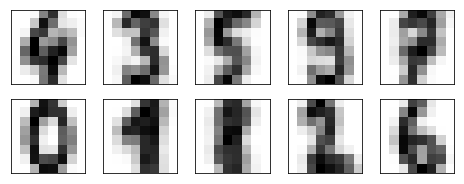

In [57]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [51]:
topic_num = 11

In [52]:
d_ENGTRANS = {
 '4대강': 'Four Major Rivers',
 '가격': 'Price',
 '가뭄': 'Draught',
 '가스': 'Gas',
 '가입': 'Joining',
 '가족': 'Family',
 '가치': 'Value',
 '각국': 'Various Countries',
 '감소': 'Decrease',
 '감축': 'Reduction',
 '강남구': 'Gangnam Province',
 '강조': 'Emphasize',
 '강화': 'Strengthening',
 '개국': 'Opening',
 '개념': 'Concept',
 '개발': 'Development',
 '개발도상국': 'Developing Countries',
 '개최': 'Host',
 '개혁': 'Reform',
 '거래': 'Trade',
 '거리': 'Street',
 '거부': 'Refusal',
 '건강': 'Health',
 '건설': 'Construction',
 '검사': 'Inspection',
 '겨울': 'Winter',
 '결과': 'Result',
 '결론': 'Conclusion',
 '결정': 'Decision',
 '경고': 'Warning',
 '경기': 'Economic Conditions',
 '경영': 'Business Management',
 '경유': 'Diesel',
 '경제': 'Economy',
 '계획': 'Plan',
 '곡물': 'Grains',
 '골프': 'Golf',
 '골프장': 'Golf Club',
 '공개': 'Unveil',
 '공동': 'Joint',
 '공사': 'Construction (Synonym)',
 '공화당': 'Republican Party',
 '과정': 'Process',
 '과학': 'Science',
 '과학자': 'Scientist',
 '관계': 'Relationship',
 '관련': 'Relevance',
 '관리': 'Management',
 '관심': 'Care',
 '관측': 'Observation',
 '교수': 'Professor',
 '교육': 'Education',
 '교토': 'Kyoto',
 '교토의정서': 'Kyoto Protocol',
 '구조': 'Structure',
 '구체': 'Specific',
 '구축': 'establishment',
 '국가': 'Nation',
 '국내': 'Domestic',
 '국민': 'People of a nation',
 '국민투표': 'General Election',
 '국장': 'Director of Bureau',
 '국제': 'International',
 '규모': 'Volume',
 '규제': 'Regulation',
 '그녀': 'Her',
 '그린란드': 'Greenland',
 '글로벌': 'Global',
 '금융': 'Finance',
 '기능': 'Function',
 '기록': 'Record',
 '기부': 'Donation',
 '기사': 'Article',
 '기상': 'Weather',
 '기상청': 'Meteorological Office',
 '기술': 'Technology',
 '기업': 'Corporation',
 '기온': 'Temperature (Synonym)',
 '기준': 'Standard',
 '기지': 'Station',
 '기획': 'Planning',
 '기후': 'Climate',
 '기후변화협약': 'Climate Change Agreement',
 '꽃': 'Flower',
 '나라': 'Nation (Synonym)',
 '나무': 'Tree',
 '낙동강': 'Nakdong River',
 '날씨': 'Weather (Synonym)',
 '남극': 'Antarctic',
 '내복': 'Under Clothes for Winter',
 '내용': 'Contents',
 '노력': 'Effort',
 '녹색': 'Green',
 '녹조': 'Algae',
 '논의': 'Discussion',
 '농도': 'Density',
 '농산물': 'Agricultural products',
 '농업': 'Agriculture',
 '눈': 'Snow',
 '뉴욕': 'New York',
 '단체': 'Party',
 '달러': 'Dollar',
 '담당관': 'An official in charge',
 '대기': 'Atmosphere',
 '대부분': 'Majority',
 '대비': 'Preparation (Synonym)',
 '대사': 'Ambassador',
 '대상': 'Object',
 '대선': 'Presidential Election',
 '대응': 'Countermeasure',
 '대책': 'Countermeasure (Synonym)',
 '대통령': 'President',
 '대표': 'Representative',
 '대학': 'University',
 '도시': 'City',
 '독일': 'Germany',
 '돈': 'Money',
 '동물': 'Animals',
 '디자인': 'Design',
 '러시아': 'Russia',
 '리조트': 'Resort',
 '마련': 'Preparation',
 '마을': 'Town',
 '마음': '(the) Mind',
 '마이크로': 'Micro',
 '마지막': 'The Last',
 '매출': 'Sales',
 '면적': '(land) Area',
 '멸종': 'Extinction',
 '명태': 'Pollack',
 '모두': 'Everyone',
 '모습': 'Features',
 '목표': 'Target',
 '무기': 'Weapon',
 '무료': 'Free of Charge',
 '무엇': 'What',
 '문제': 'Problem',
 '문화': 'Culture',
 '물': 'Water',
 '물질': 'Material',
 '미국': 'United States',
 '미래': 'Future',
 '민주당': 'Democratic Party',
 '바다': 'Sea',
 '박근혜': 'Park Guen-Hye',
 '박람회': 'Exposition',
 '반기문': 'Ban Ki-Moon',
 '반대': 'Opposite',
 '반면': 'Meanwhile',
 '발견': 'Discovery',
 '발리': 'Bali (Island)',
 '발생': 'Occurrence',
 '발전': 'Advancement',
 '발전소': 'Power Plant',
 '발표': 'Announcement',
 '발효': 'Coming into Effect',
 '방안': 'Solution (synonym)',
 '방지': 'Prevention',
 '배': 'Ship',
 '배출': 'Emissions',
 '배출량': 'Quantity of Emissions',
 '법률': 'Legislation',
 '베를린': 'Berlin',
 '변화': 'Changes',
 '보고서': 'Report',
 '보호': 'Protection',
 '본부': 'Head Quarter',
 '본부장': 'Superintendent',
 '부분': 'Parts',
 '부시': 'Bush',
 '부장': 'Manager',
 '부족': 'Scarcity',
 '북극': 'Arctic',
 '북극곰': 'Polar Bear',
 '북극해': 'The Artic Ocean',
 '북한': 'North Korea',
 '분석': 'Analysis',
 '분야': 'Area',
 '브랜드': 'Brand',
 '비': 'Rain',
 '비준': 'Ratification',
 '빌딩': 'Building',
 '빙하': 'Iceberg',
 '사건': 'Event',
 '사고': 'Accident',
 '사과': 'Apple',
 '사람': 'Human',
 '사무총장': 'UN Secretary-General',
 '사실': 'Fact',
 '사업': 'Project',
 '사용': 'Use',
 '사장': 'Head of a copany',
 '사회': 'Society',
 '산림': 'Forest',
 '산업': 'Industry',
 '삶': 'Life',
 '상무': 'Executive Director',
 '상승': 'Rise',
 '상태': 'Status',
 '상품': 'Product',
 '상황': 'Situation',
 '생각': 'Idea',
 '생물': 'Living Species',
 '생산': 'Production',
 '생태': 'Ecology',
 '생태계': 'Ecosystem',
 '생활': 'Living',
 '서비스': 'Service',
 '서울': 'Seoul',
 '서울특별시': 'Seoul Metropolis',
 '석유': 'Oil',
 '선진국': 'Advanced Countries',
 '설명': 'Explanation',
 '설치': 'Installation',
 '성장': 'Growth',
 '세계': 'World',
 '세상': 'World (Synonym)',
 '소나무': 'Pine Tree',
 '소비': 'Consumption',
 '소비자': 'Consumers',
 '소재': 'Material',
 '수도': 'Capital City',
 '수술': 'Surgery',
 '수온': 'Water Temperature',
 '수요': 'Demand',
 '수익률': 'Price-earning Ratio',
 '수준': 'level',
 '숲': 'Forest (Synonym)',
 '스타일': 'Style',
 '승용차': 'Personal Vehecle',
 '승진': 'Promotion',
 '시간': 'Time',
 '시기': 'Timing',
 '시대': 'Era',
 '시민': 'Citizen',
 '시설': 'Facility',
 '시스템': 'System',
 '시작': 'Beginning',
 '시장': 'Market',
 '시행': 'Implementation (Synonym)',
 '식량': 'Food',
 '식물': 'Botany',
 '식품': 'Grocery',
 '신재생에너지': 'Renewable Energy',
 '실장': 'Section Chief',
 '아시아': 'Asia',
 '아이': 'Child',
 '아파트': 'Apartment',
 '안전': 'Safety',
 '양국': 'Two Countries',
 '어린이': 'Children',
 '어종': 'Fish Species',
 '얼음': 'Ice',
 '업체': 'Company',
 '에너지': 'Energy',
 '엑스포': 'EXPO',
 '엘니뇨': 'El Nino',
 '여름': 'Summer',
 '여성': 'Women',
 '여수': 'Yeosu',
 '여수세계박람회': 'Yeosu International Exposition (EXPO)',
 '여수시': 'City of Yeosu',
 '여행': 'Travel',
 '역사': 'History',
 '역할': 'Role',
 '연구': 'Research',
 '연구소': 'Research Center',
 '연대': 'Solidarity',
 '연설': 'Speech',
 '열': 'Heat',
 '영국': 'England',
 '영하': 'A sub-zero temperature',
 '영향': 'Influence',
 '영화': 'Movie',
 '예상': 'Estimation',
 '예정': 'Schedule',
 '예측': 'Forecast',
 '오바마': 'Obama',
 '오염': 'Pollution',
 '오존층': 'Ozon Layer',
 '온난': 'Warm',
 '온난화': 'Warming',
 '온도': 'Temperature',
 '온실': 'Greenhouse (effect)',
 '온실가스': 'Greenhouse Gas',
 '와인': 'Wine',
 '외교': 'Diplomacy',
 '외국인': 'Foreigners',
 '요구': 'Demand',
 '우려': 'Concern',
 '우주': '(the) Universe',
 '운영': 'Operation',
 '운용': 'Operation (Synonym)',
 '원인': 'Cause',
 '원자력': 'Nuclear Power',
 '원전': 'Nuclear Power Plant',
 '원칙': 'Principle',
 '위기': 'Crisis',
 '위원회': 'Committee',
 '위치': 'Location',
 '위험': 'Danger',
 '유럽': 'Europe',
 '유엔': 'UN',
 '유일': 'Only',
 '유지': 'Sustain',
 '유치': 'Host (Synonym)',
 '의무': 'Obligation',
 '의미': 'Significance',
 '의원': 'Senetor',
 '의정서': 'Protocol',
 '이견': 'Disagreement',
 '이라크': 'Iraq',
 '이명박': 'Lee Myung-Bak',
 '이산화탄소': 'Carbon Dioxide',
 '이상': 'Abnormal',
 '이야기': 'Story',
 '이용': 'Utilization',
 '이유': 'Main Reason',
 '이전': 'Relocation',
 '이해': 'Understanding',
 '이행': 'Implementation',
 '인간': 'Humane',
 '인구': 'Human Population',
 '인기': 'Popular',
 '인도': 'India',
 '인류': 'Mankind',
 '인사': 'Greeting',
 '일본': 'Japan',
 '입장': 'Position',
 '자녀': '(own) Children',
 '자동차': 'Vehicle',
 '자산운용': 'Asset management',
 '자신': 'Self',
 '자연': 'Nature',
 '자원': 'Resource',
 '자전거': 'Bicycle',
 '작품': 'Work of art',
 '장관': 'Secretary',
 '장기': 'Long-term',
 '장마': 'Monsoon',
 '재배': 'Cultivation',
 '재앙': 'Catastrophe',
 '재킷': 'Jacket',
 '적극': 'Actively',
 '적용': 'Application',
 '전기': 'Electricity',
 '전략': 'Strategy',
 '전력': 'Electric Power',
 '전망': 'Prospect',
 '전문가': 'Expert',
 '전보': 'Personnel transfer',
 '전제': 'Presupposition',
 '전직': 'Previous',
 '전체': 'Whole',
 '절약': 'Saving',
 '정부': 'Government',
 '정상': 'Summit',
 '정상회담': 'Summit Conference',
 '정상회의': 'Summit Conference (Synonym)',
 '정책': 'Policy',
 '정치': 'Politics',
 '제기': 'Suggestion',
 '제시': 'Suggestion',
 '제주': 'Jeju (Island)',
 '제주도': 'Jeju Island',
 '제품': 'Product (Synonym)',
 '조건': 'Qualification',
 '조사': 'Investigation',
 '조성': 'Construct',
 '조치': 'Measures',
 '종합': 'Summary',
 '주가': 'Strock Price',
 '주민': 'Residents',
 '주범': 'Main Culprit',
 '주식': 'Stock',
 '주장': 'Argument',
 '주제': 'Topic',
 '주택': 'House',
 '준설': 'Dredge',
 '중국': 'China',
 '증가': 'Increase',
 '지구': 'Earth',
 '지금': 'Now',
 '지속': 'Sustainability',
 '지역': 'Region',
 '지원': 'Support',
 '진행': 'Ongoing',
 '집중': 'Focus',
 '차': 'Vehicle (Synonym)',
 '차량': 'Vehicle (Another Synonym)',
 '참석': 'Attendance',
 '참여': 'Participation',
 '창출': 'Generate',
 '채택': 'Adoption',
 '책임': 'Responsibility',
 '처장': 'Dean',
 '처지': 'Situation (Synonym)',
 '체험': 'Experience',
 '촉진': 'Stimulation',
 '총리': 'Prime Minister',
 '총장': 'Secretary-General',
 '총회': 'Conference',
 '최고': 'Peak',
 '최근': 'Recent',
 '최대': 'Maximum',
 '추가': 'Addition',
 '추진': 'Pushing Forward',
 '출시': 'Launch (a prodocut)',
 '취업': 'Employment',
 '친화': 'Friendly',
 '친환경': 'Ecofriendly',
 '친환경자동차': 'Eco-Friendly Vehicle',
 '캠페인': 'Campaign',
 '코펜하겐': 'Copenhagen',
 '클린턴': 'Clinton',
 '탄소': 'Carbon',
 '탄소배출권': 'Carbon Credit',
 '태양광': 'Solar-light Power',
 '태풍': 'Typhoon',
 '투자': 'Investment',
 '팀장': 'Team Leader',
 '파괴': 'Destruction',
 '파리': 'Paris',
 '판매': 'Sale',
 '펀드': 'Stock Fund',
 '편도선염': 'Tonsillitis',
 '평가': 'Evaluation',
 '평균': 'Average',
 '평년': 'Average Year',
 '포럼': 'Forum',
 '포함': 'Contain',
 '피부': 'Skin',
 '피해': 'Damage',
 '필요': 'Necessity',
 '하천': 'Stream',
 '학생': 'Students',
 '한국': 'Korea',
 '한반도': 'Korean Peninsula',
 '합의': 'Agreement',
 '항로': 'Route',
 '해결': 'Solution',
 '해수면': 'Sea level',
 '해양': 'Ocean',
 '해체': 'Deconstruction',
 '행동': 'Action',
 '행사': 'Ceremony',
 '행정부': 'Administration',
 '헌법': 'Constitution',
 '혁신': 'Innovation',
 '현상': 'Phenomenon',
 '현재': 'Present Time',
 '현지': 'Local',
 '협력': 'Cooperation',
 '협상': 'Negotiation',
 '협약': 'Convention',
 '호텔': 'Hotel',
 '홍수': 'Flood',
 '화보': 'Photo Book',
 '화석연료': 'Fossil Energy',
 '확보': 'Guarantee',
 '환경': 'Environment',
 '활동': 'Activity',
 '황사': 'Asian Dust',
 '회사': 'Corporation (Synonym)',
 '회의': 'Meeting',
 '회장': 'Chairperson',
 '효과': 'Effect',
 '효율': 'Efficiency',
 '후보': 'Candidate',
 '후쿠시마': 'Fukushima',
 '휴가': 'Vacation',
 '히말라야': 'Himalaya'
}    

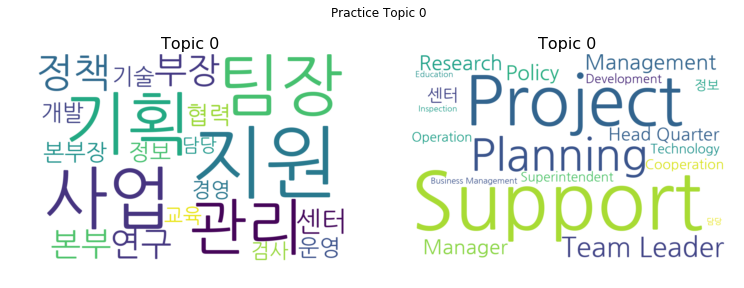

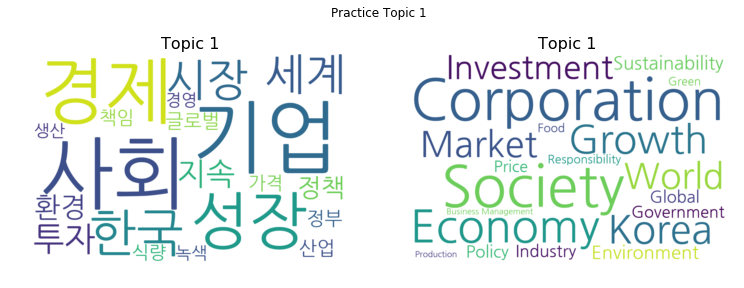

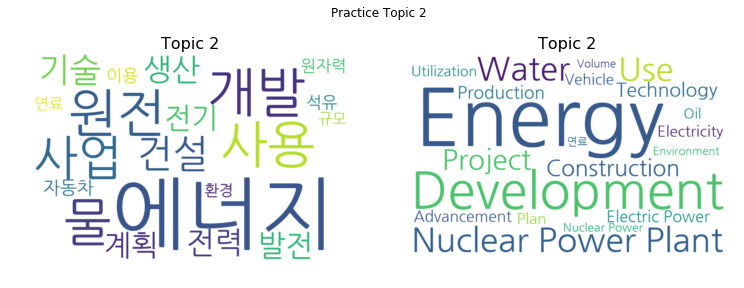

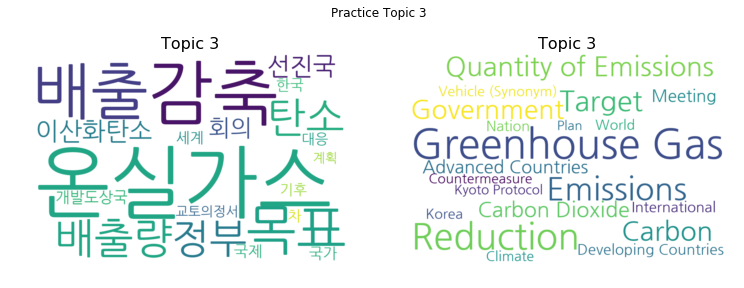

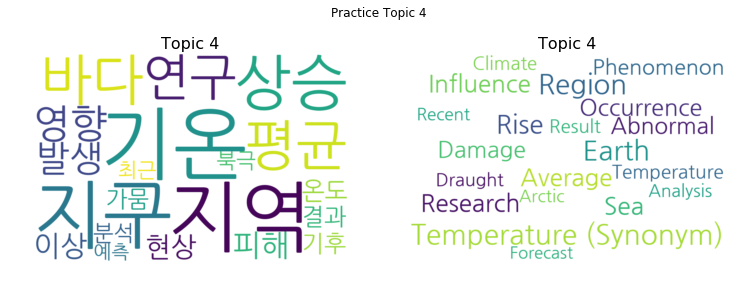

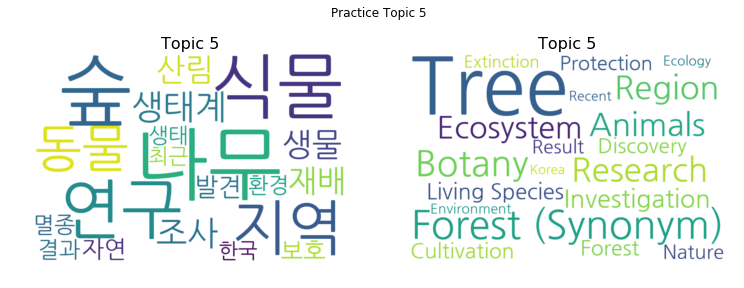

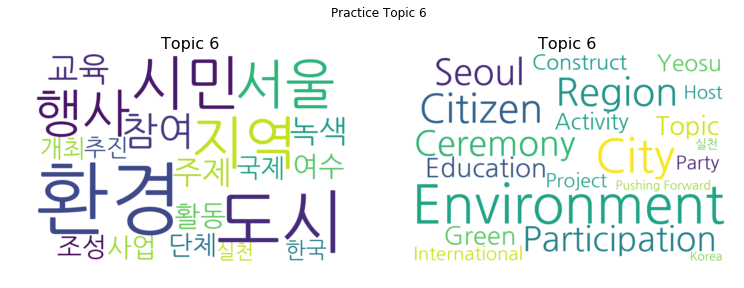

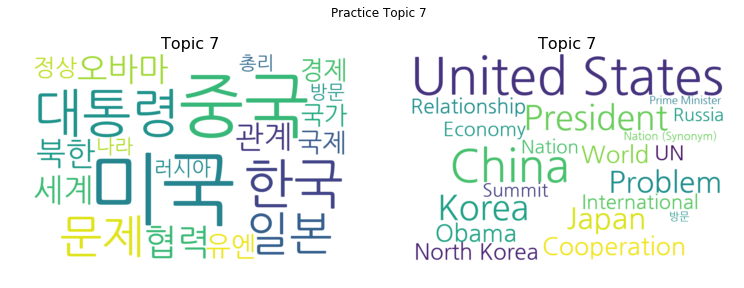

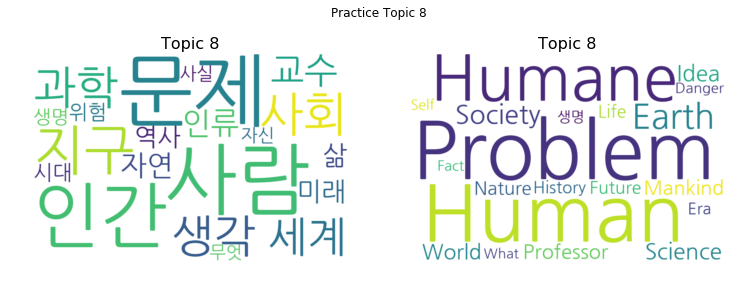

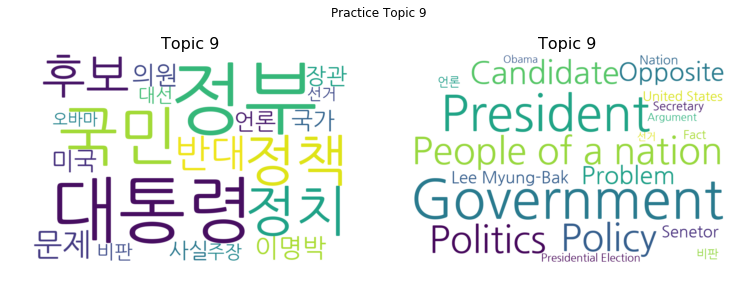

In [69]:
font_path = '/usr/bk/Library/Fonts/Nanum Gothic.ttf'
cloud_name = 'Practice'
cloud = WordCloud(font_path = font_path, background_color='white', width=1200, height=800, max_words=20, prefer_horizontal=1.0)
#language = "English"

for j in range(len(topics)):
    topic_words = dict(topics[j][1])
    topic_words2 = topic_words.copy()

    for item in topic_words2.copy():
        if item in d_ENGTRANS.keys():
            topic_words2[d_ENGTRANS[item]] = topic_words2.pop(item)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)
        
    for i, ax in enumerate(axes.flatten()):
        if i == 0:
            fig.add_subplot(ax)
            cloud.generate_from_frequencies (topic_words, max_font_size = 300)
            plt.gca().imshow(cloud, interpolation = 'bilinear')
            plt.gca().set_title('Topic ' + str(j), fontdict=dict(size=16))
            plt.gca().axis('off')

        else:
            fig.add_subplot(ax)
            cloud.generate_from_frequencies (topic_words2, max_font_size = 300)
            plt.gca().imshow(cloud, interpolation = 'bilinear')
            plt.gca().set_title('Topic ' + str(j), fontdict=dict(size=16))
            plt.gca().axis('off')

    plt.axis('off')b
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.suptitle(cloud_name+' Topic '+ str(j))
    plt.subplots_adjust(top=0.98, bottom= 0.45, left=0.10, right=0.9, hspace= 0.05, wspace=0.2)

    plt.savefig(cloud_name+'_Topic' + str(j))


#     for j in range(2):
#         if j == 0:
#             language = "Korean"
#         else:
#             language = "English"

#     if language == "English":
#         for item in topic_words.copy():
#             if item in d_ENGTRANS.keys():
#                 topic_words[d_ENGTRANS[item]] = topic_words.pop(item)

#     cloud_name2 = cloud_name + 'Topic ' + str(i)        
#     cloud_name3 = cloud_name2 + '_' + language + '.png'

#     cloud.generate_from_frequencies(topic_words, max_font_size=300)

#     plt.title(cloud_name2+'\n')
#     plt.imshow(cloud, interpolation = 'bilinear')
#     plt.axis("off")

    plt.show()


In [1]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data


array([ 93, 171, 164,  83, 140, 104,  37, 123, 206, 293, 239, 288, 349,
       420, 502, 544, 483, 396, 320, 406, 440, 457, 488, 476, 466, 415,
       393, 376, 329, 412, 450, 481, 576, 582, 548, 542, 498, 577, 668,
       665, 637, 566, 552, 624, 578, 675, 575, 656, 564, 536])

Text(0.5, 0, '시간(분)')

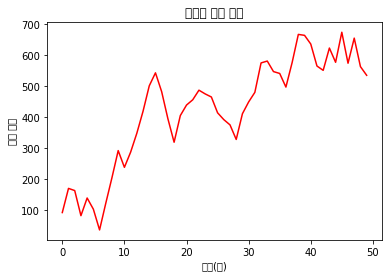

In [3]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')


In [74]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.2
설치 위치:  /anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /Users/bk/.matplotlib
캐시 위치:  /Users/bk/.matplotlib


In [75]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [76]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [77]:
print(len(font_list)) 

201


In [78]:
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

201


In [79]:
font_list[:10] 

['/Users/bk/Library/Fonts/Nanum Brush Script.ttf',
 '/System/Library/Fonts/SFNSRounded-Light.otf',
 '/System/Library/Fonts/SFCompactRounded-Heavy.otf',
 '/Library/Fonts/Georgia Bold.ttf',
 '/Library/Fonts/STIXSizFourSymBol.otf',
 '/System/Library/Fonts/Symbol.ttf',
 '/Library/Fonts/NISC18030.ttf',
 '/System/Library/Fonts/SFNSDisplay-UltralightItalic.otf',
 '/Library/Fonts/AppleMyungjo.ttf',
 '/Library/Fonts/Comic Sans MS Bold.ttf']

In [80]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]


201


['DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeOneSym',
 'DejaVu Serif']

In [81]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', '/Users/bk/Library/Fonts/Nanum Gothic Bold.ttf'),
 ('NanumGothicCoding', '/Users/bk/Library/Fonts/Nanum GothicCoding.ttf'),
 ('Nanum Brush Script', '/Users/bk/Library/Fonts/Nanum Brush Script.ttf'),
 ('NanumGothic', '/Users/bk/Library/Fonts/Nanum Gothic ExtraBold.ttf'),
 ('NanumGothic', '/Users/bk/Library/Fonts/Nanum Gothic.ttf'),
 ('NanumGothicCoding', '/Users/bk/Library/Fonts/Nanum GothicCoding Bold.ttf'),
 ('NanumMyeongjo', '/Users/bk/Library/Fonts/Nanum Myeongjo.ttf'),
 ('Nanum Pen', '/Users/bk/Library/Fonts/Nanum Pen Script.ttf'),
 ('NanumMyeongjo', '/Users/bk/Library/Fonts/Nanum Myeongjo Bold.ttf'),
 ('NanumMyeongjo', '/Users/bk/Library/Fonts/Nanum Myeongjo ExtraBold.ttf')]

In [82]:
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [83]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace']) 


serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [6]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (14,4)

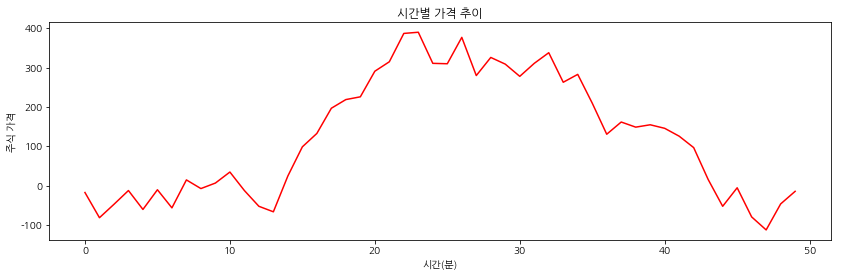

In [7]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()
